## Churn Prediction Demo

- Objective: build machine learning model to predict churn
- Datasource: https://www.kaggle.com/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Feature description:

- customerID Customer ID
- gender Whether the customer is a male or a female
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

In [60]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import pandas as pd
import os
import numpy as np

from custom_visualizations import *

In [62]:
os.listdir('data')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [63]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Initial Data Exploration

In [64]:
df.shape

(7043, 21)

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
print('Original file data types: ')
df.dtypes

Original file data types: 


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [67]:
print('Are all customers unique?')
if len(df.customerID.unique()) == df.shape[0]:
    print('Yes')

Are all customers unique?
Yes


In [68]:
print('Number of nulls for each column:')
df.isna().sum()

Number of nulls for each column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Preparation

In [69]:
df.gender.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [70]:
#removing customerID - we already checked that customers are unique
df.drop(columns = ['customerID'], inplace=True)

In [71]:
#Binarizing features:
df.gender.replace(('Male', 'Female'), (1, 0), inplace=True)

In [72]:
df.gender.head()

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [73]:
#Same for other binary features (will not show the same check for each as done above)
for i in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[i].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Before we convert categorical features into numerical with get_dummies, 
let's investigate if there are high class imbalances in the inputs

In [74]:
#list of cat columns that still need to be converted
cat_cols = list(df.select_dtypes(include='object').columns)
len(cat_cols)

11

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalCharges']

Notice TotalCharges should simply be converted to numeric but was loaded with obj data type

In [77]:
#Casting TotalCharges to numeric:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [78]:
#Removing TotalCharges from our list of remaining categorical columns:
cat_cols.remove('TotalCharges')

In [79]:
#The new list is ready for exploration:
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

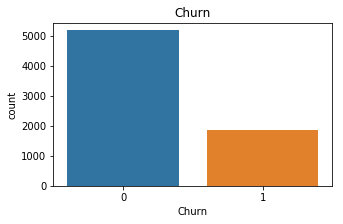

In [80]:
#Simple barplot of churn
plt.figure(figsize=(5,3))
sns.countplot(df['Churn'])
plt.title('Churn')
plt.show()

Notice we have a strong class imbalance for the target feature - we will have to take action during modeling

Let's analyze each of the remaining categorical features both with churn as hue and without it

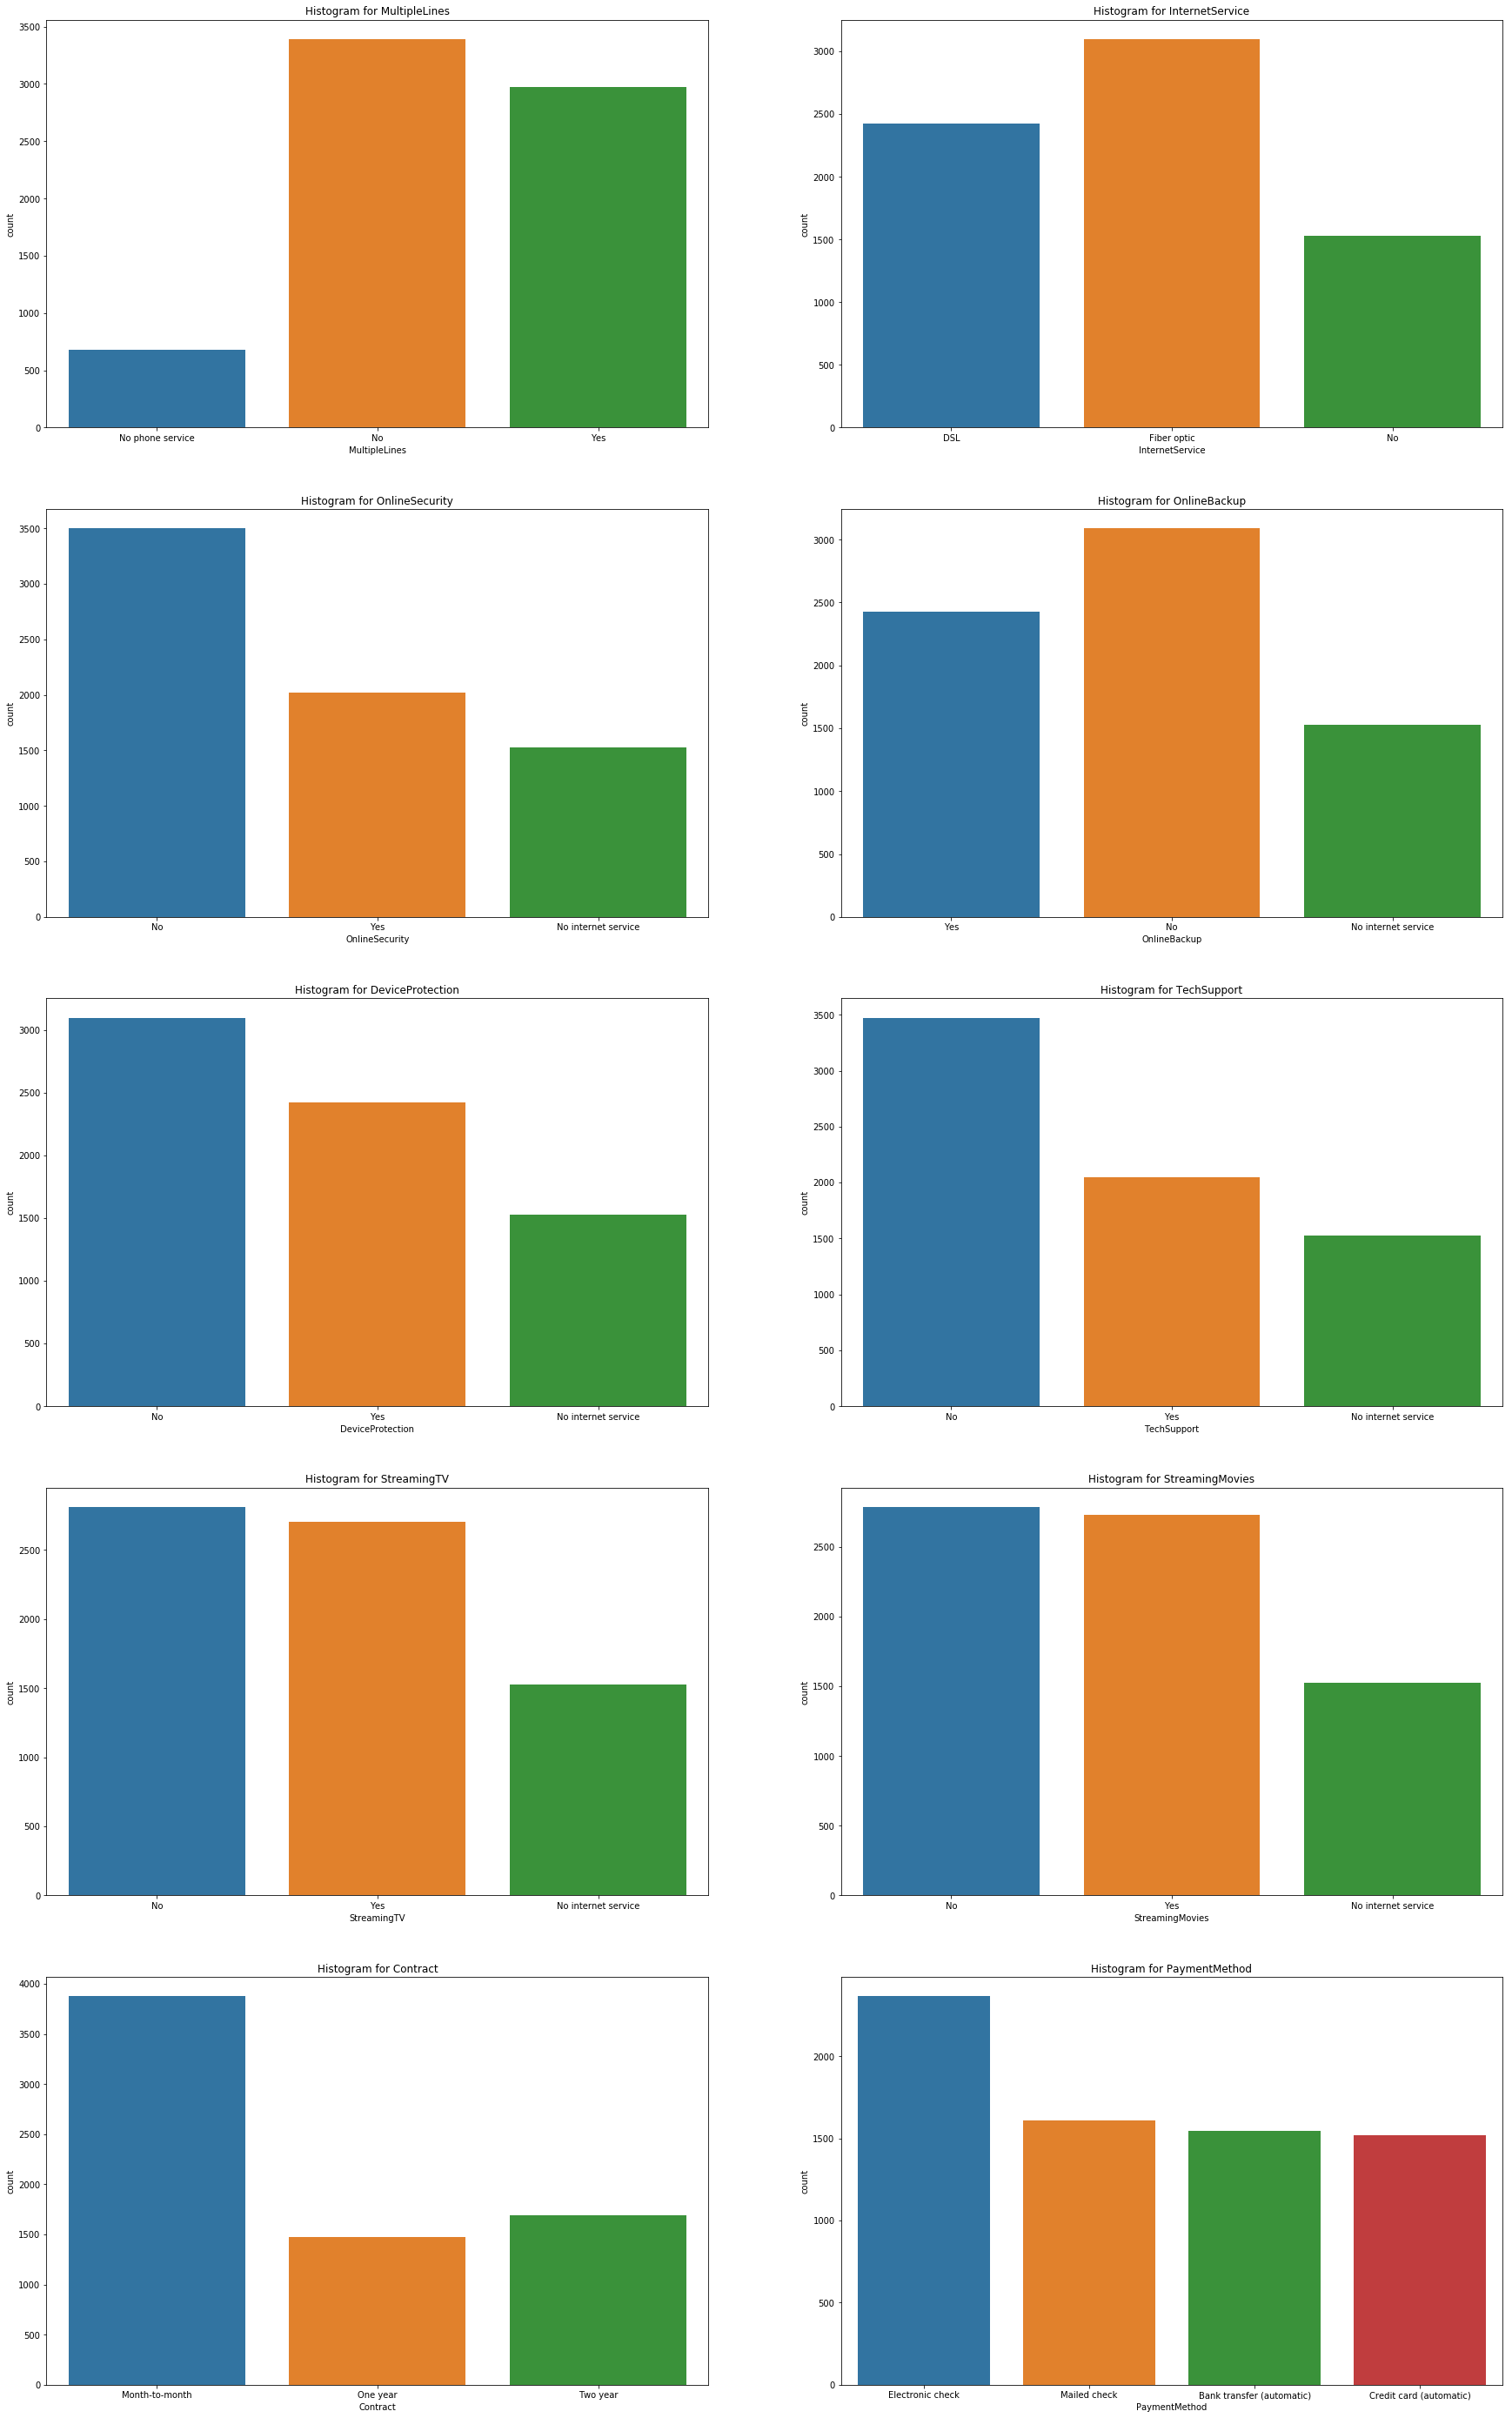

In [81]:
show_countplots(df, cat_cols, None)

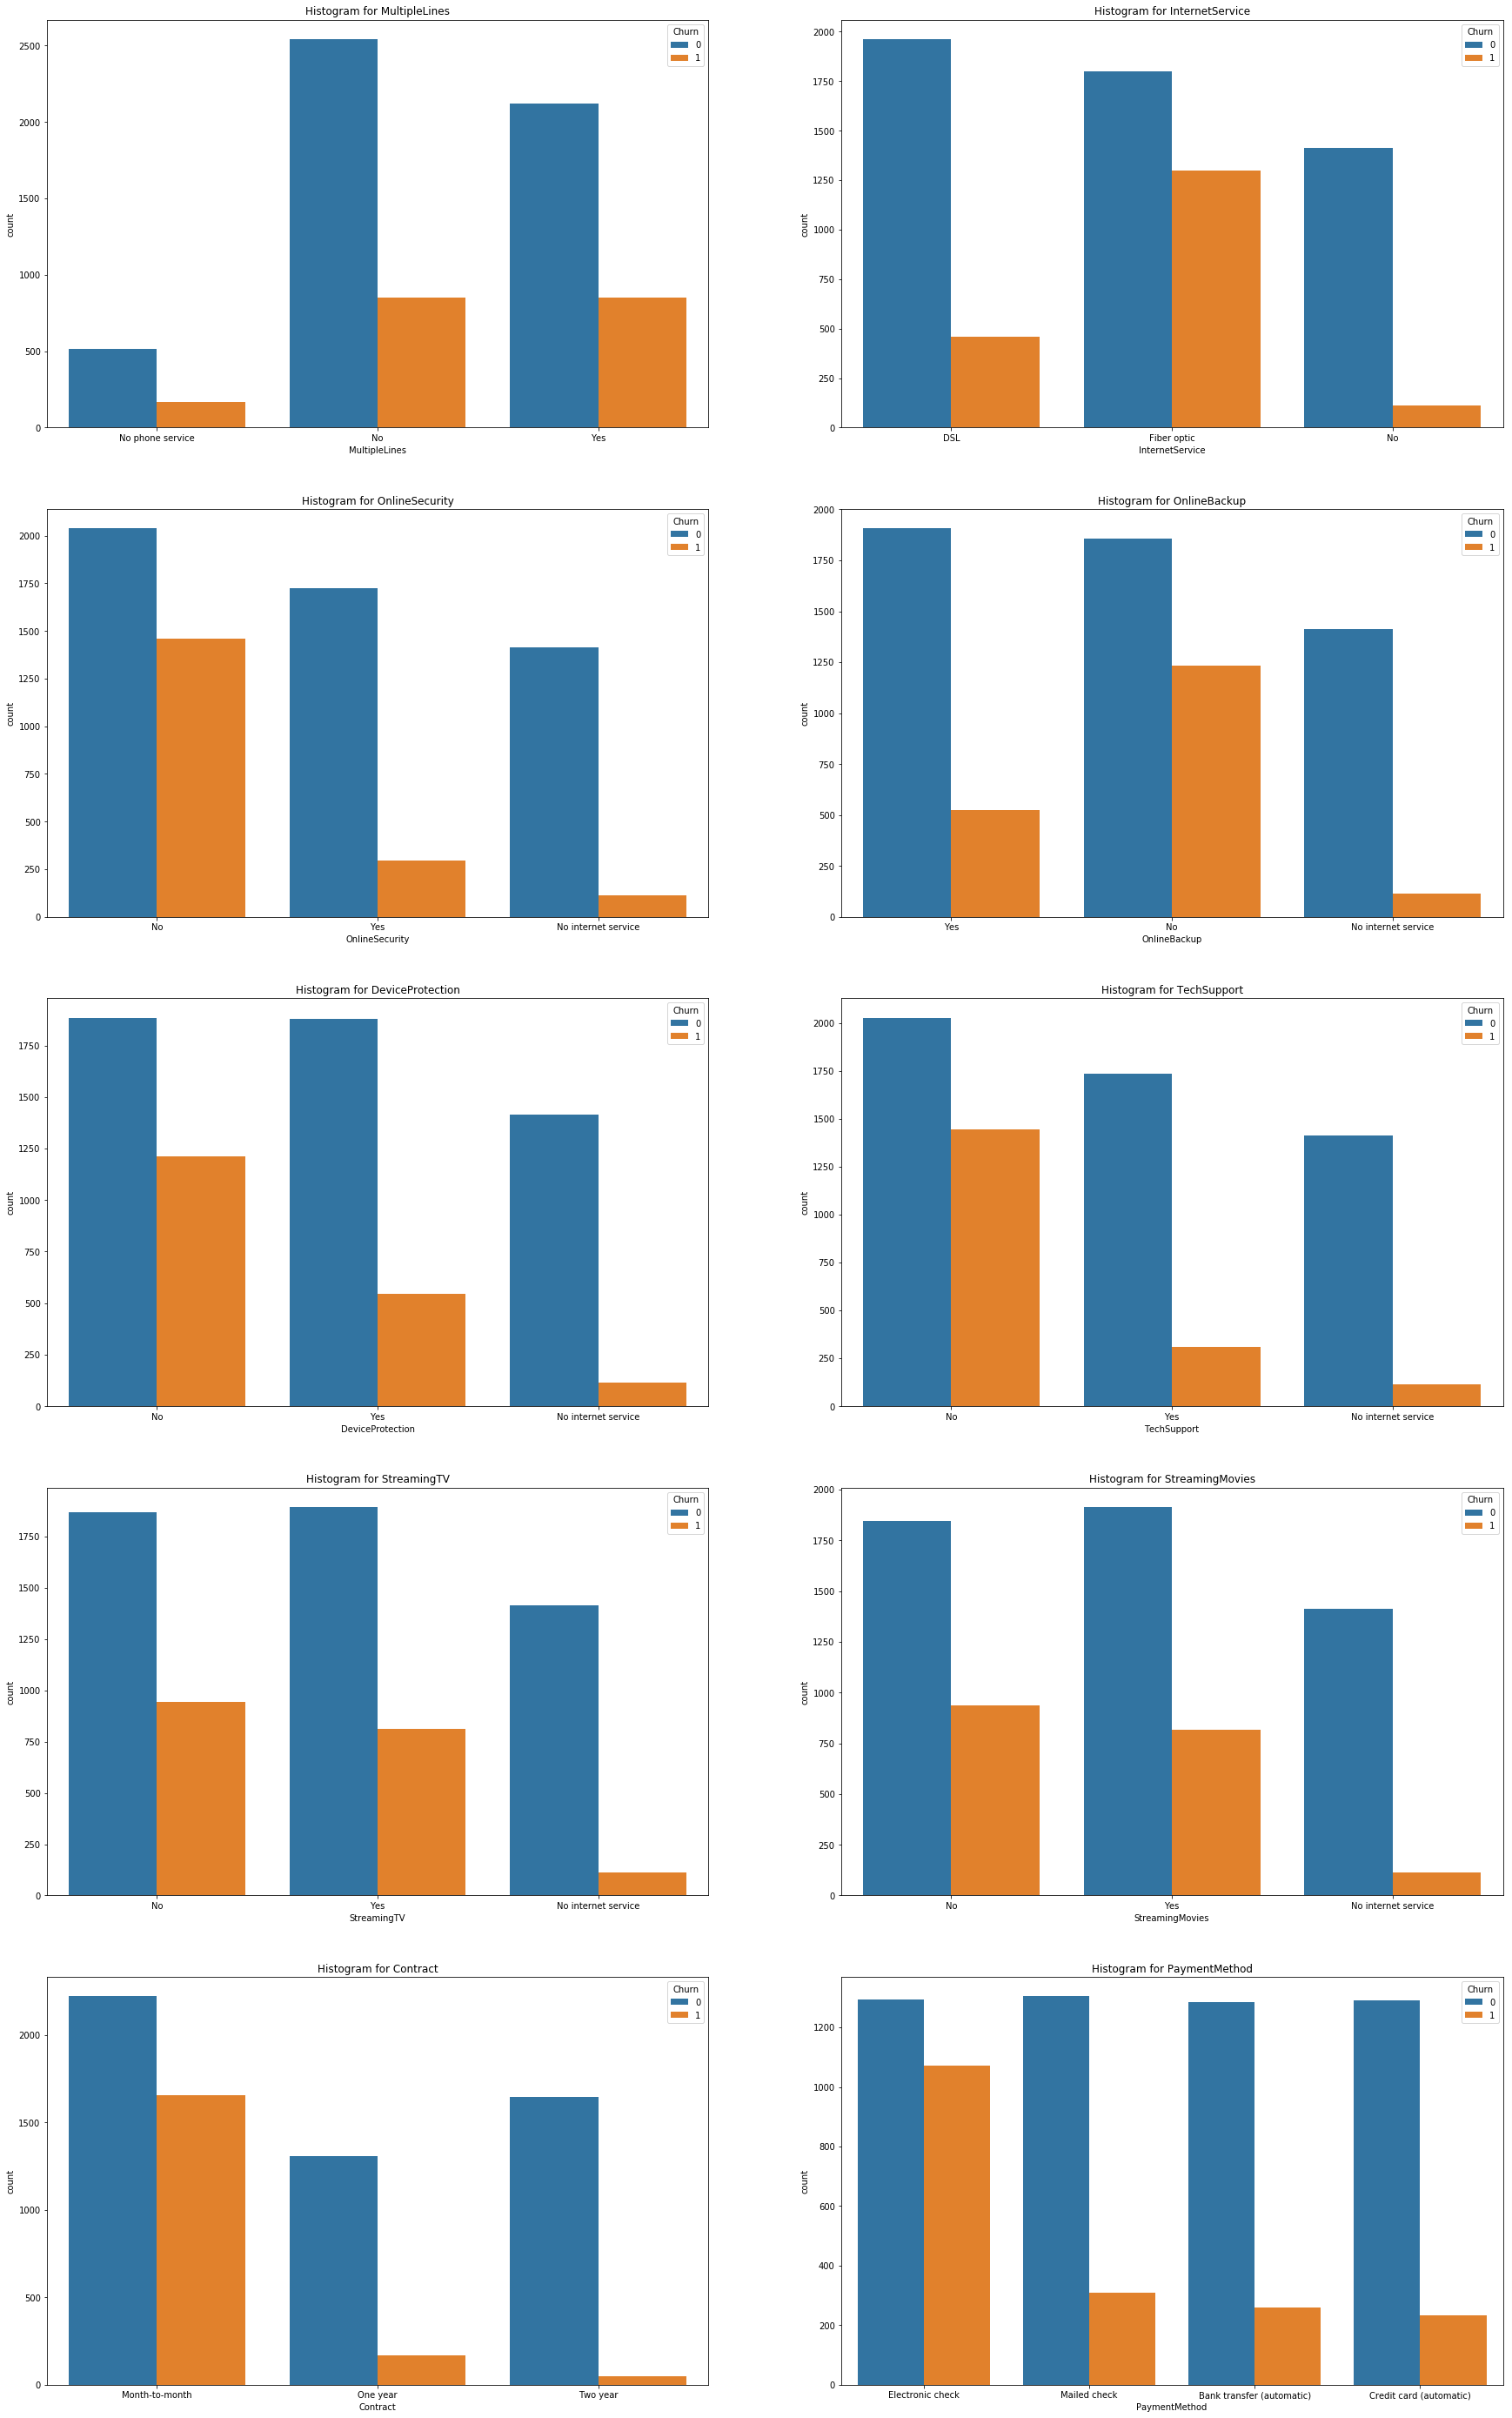

In [82]:
show_countplots(df, cat_cols, 'Churn')

It looks like there are some insights to keep in mind during the modeling process:
- Features related to internet service are highly correlated and in some cases almost identical e.g. internetservice and online backup (this must be a free feature with internet service). Device support and Streaming protection are really similar, as well as Streaming TV and Streaming Movies
- Most features exhibit some variation within their categories, with exception of payment method where three out of the four categorical values are almost the same. We might consider reducing payment method to two categories (electronic check vs rest)
- We cannot simply drop rows with value "no internet service" because there is a significant amount of them and they exhibit different patterns with respect to the target variable

We will first one hot encode all categorical features, and then potentially remove some as part of our modeling. Ideally we would analyze which of the new encoded features should be dropped for each original feature but we will skip that analysis for this demo.

In [83]:
print("New features created as part of one hot encoding: ")
[i for i in onehot_cols if i not in df.columns]

New features created as part of one hot encoding: 


['MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [84]:
#One hot encoding the cat variables:
#Notice we will remove the first category for each encoded column to avoid linear dependence among the new features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Some data visualization and data exploration with numeric features i.e. tenure, MonthlyCharges and TotalCharges

In [85]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


We performed the check on nulls before casting TotalCharges to a float so we finally notice at this point that there are some nulls in the feature. Let's explore further

In [86]:
df.TotalCharges.isna().sum()

11

What do customers with null total charges look like? Why do they not have null values for monthly charges?

In [88]:
df[df.TotalCharges.isna()==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,1,52.55,NaN,0,...,1,0,1,0,0,0,1,0,0,0
753,1,0,0,1,0,1,0,20.25,NaN,0,...,0,1,0,1,0,0,1,0,0,1
936,0,0,1,1,0,1,0,80.85,NaN,0,...,0,0,1,0,1,0,1,0,0,1
1082,1,0,1,1,0,1,0,25.75,NaN,0,...,0,1,0,1,0,0,1,0,0,1
1340,0,0,1,1,0,0,0,56.05,NaN,0,...,1,0,1,0,0,0,1,1,0,0
3331,1,0,1,1,0,1,0,19.85,NaN,0,...,0,1,0,1,0,0,1,0,0,1
3826,1,0,1,1,0,1,0,25.35,NaN,0,...,0,1,0,1,0,0,1,0,0,1
4380,0,0,1,1,0,1,0,20.00,NaN,0,...,0,1,0,1,0,0,1,0,0,1
5218,1,0,1,1,0,1,1,19.70,NaN,0,...,0,1,0,1,0,1,0,0,0,1
6670,0,0,1,1,0,1,0,73.35,NaN,0,...,1,0,1,0,0,0,1,0,0,1


/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


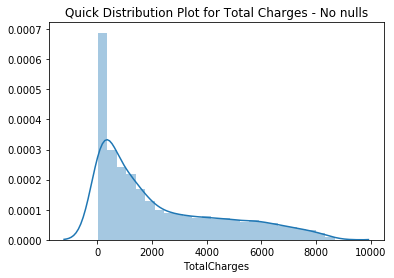

In [91]:
sns.distplot(df.TotalCharges.dropna())
plt.title('Quick Distribution Plot for Total Charges - No nulls')
plt.show()

There doesn't seem to be any particular pattern with respect to these 11 null values, and while our distribution plot indicates a pretty wide range of values, we can simply impute the 11 values with the mean. A more advanced methodology would be to assign each of the 11 customers to a segment and then impute total charges for the segment

In [93]:
#imputing the 11 missing values
df.TotalCharges.fillna(df.TotalCharges.mean(),inplace=True)

Distribution Plots for the 3 Numeric Features:

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


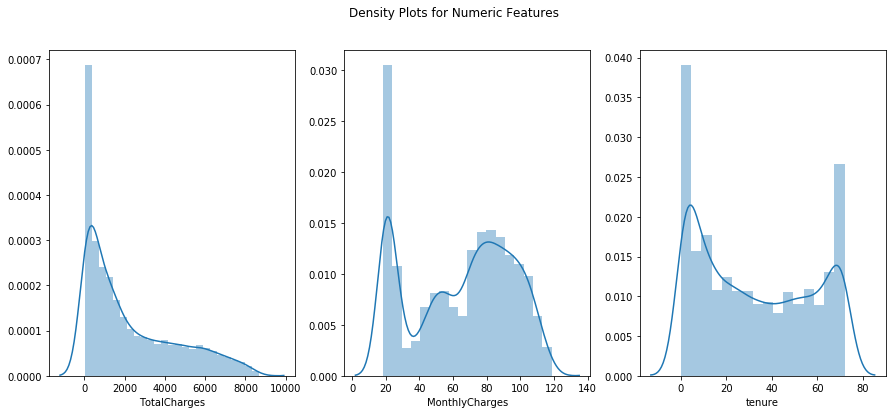

In [103]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6), sharey=False)
sns.distplot(df.TotalCharges, ax=ax1)
sns.distplot(df.MonthlyCharges, ax=ax2)
sns.distplot(df.tenure, ax=ax3)
plt.suptitle('Density Plots for Numeric Features')
plt.show()

Same as above, but with distinction between churn and non churn customers

In [115]:
churn = df[df['Churn'] == 1]
nochurn = df[df['Churn'] == 0]

/Users/pauldefusco/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


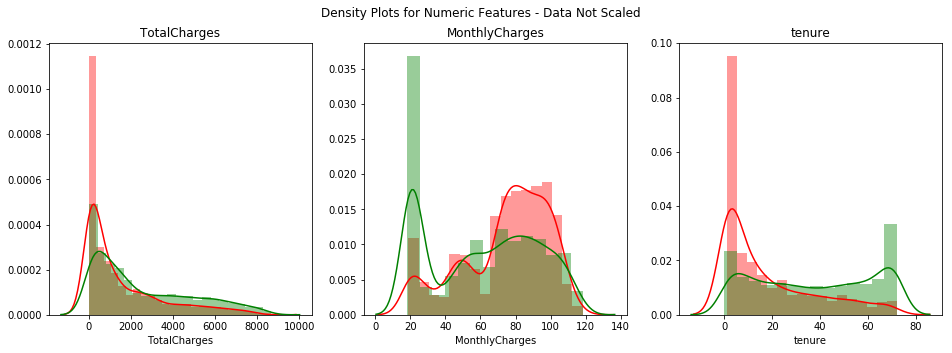

In [150]:
fig, axs = plt.subplots(1,3, figsize=(16, 5), facecolor='w', edgecolor='k')

axs = axs.ravel()

for i,k in zip(range(3),['TotalCharges', 'MonthlyCharges', 'tenure']):
    sns.distplot(churn[k], color='red', label='Churn', ax=axs[i])
    sns.distplot(nochurn[k], color='green', label='No Churn', ax=axs[i])
    axs[i].set_title(str(k))

plt.suptitle('Density Plots for Numeric Features - Data Not Scaled')
plt.show()

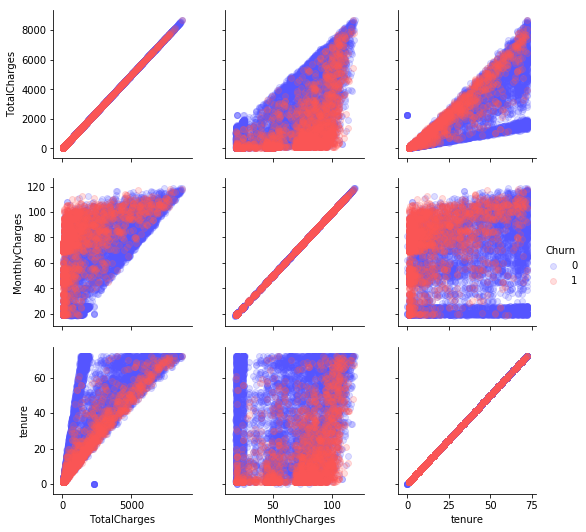

In [148]:
g = sns.PairGrid(df, vars=['TotalCharges', 'MonthlyCharges', 'tenure'],
                 hue='Churn', palette='seismic')
g.map(plt.scatter, alpha=0.2)
g.add_legend();
plt.show()

In [ ]:
Baseline Model